In [1]:
import scanpy as sc
import pandas as pd
import numpy as np
import sys
import os
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import ast

In [2]:
sc.logging.print_header()

scanpy==1.8.0 anndata==0.8.0 umap==0.4.6 numpy==1.20.1 scipy==1.6.1 pandas==1.3.5 scikit-learn==0.24.1 statsmodels==0.13.5 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


In [3]:
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

In [4]:
sc.set_figure_params(
    dpi=300,dpi_save=600,
    fontsize=12,
    frameon=False,
    transparent=True,
)

In [5]:
sns.set_style(style="white")
sns.set_context(context="paper")

### Import

In [6]:
adata = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.h5ad')

In [7]:
adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    var: 'gene_ids', 'feature_type', 'mito', 'ribo', 'hb', 'cc', 'ig', 'tcr', 'n_counts-0', 'n_counts_raw-0', 'n_counts_spliced-0', 'n_counts_unspliced-0', 'n_cells-0', 'n_cells_raw-0', 'n_cells_spliced-0', 'n_cells_unspliced-0', 'n_counts-1', 'n_counts_raw-1', 'n_counts_spliced-1', 'n_counts_unspliced-1', 'n_cells-1', 'n_cells_raw-1', 'n_cells_spliced-1', 'n_cells_unspliced-1'
    uns: 'age_unified_colors', 'control_vs_disease_colors', 'disease_colors', 'level_1_annot_colors', 'level_3_annot_colors', 'neighbors', 'organ_groups_colors', 'organ_unified_colors', 'study_colors', 'umap'
    obsm: 'X_mde', 'X_scANVI', 'X_umap', '_scvi_extra_continuous_covs'
    obsp: 'connectivities', 'distances'

In [8]:
adata.obs = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/pooled_healthy_disease.remapped.allgenes.fine_annot.no_doublets.20230322.csv',index_col=0)

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: DtypeWarning: Columns (73,82,83,84,86,93,102,105,112,113,114,115,117,119) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
adata

AnnData object with n_obs × n_vars = 1358576 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [10]:
fibro = adata[adata.obs.level_1_annot.isin(['Mesenchymal'])].copy()

In [11]:
fibro = adata[~adata.obs.disease.isin(['inutero','preterm'])].copy()

In [12]:
fibro

AnnData object with n_obs × n_vars = 1015440 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [13]:
del fibro.obsm
del fibro.obsp

In [14]:
fibro

AnnData object with n_obs × n_vars = 1015440 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_s

In [15]:
query_scanvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/metadata/X_scANVI/disease/disease_fine_annot_predict_Mes_20230226.csv.gz',compression='gzip',index_col=0)

#### Combine reference and query data

In [16]:
ref = sc.read_h5ad('/nfs/team205/ao15/Megagut/Annotations_v3/h5ad/compartments/pre_scvi20221124_updated_donorID_20230126/with_doublets/pooled_healthy.lv20_batch256.with_broad_annotation.20220917.with_countlayers.20221124.Mes_AP.20230126.h5ad')

In [17]:
ref

AnnData object with n_obs × n_vars = 65010 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [18]:
fibro.obs.control_vs_disease.value_counts()

control               734105
cancer_gastric        101594
pediatric_IBD          67092
crohns_disease         48074
ulcerative_colitis     35891
cancer_colorectal      28684
Name: control_vs_disease, dtype: int64

In [19]:
ref_scanvi = pd.read_csv('/nfs/team205/ao15/Megagut/Annotations_v3/models/scanvi_compartments/Mes_hvg5000.noCC_scvi.scanvi_fine_annot.20230226.csv.gz',compression='gzip',index_col=0)

In [20]:
query_scanvi

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAAGCAACACCATCCT-4918STDY7273964,-0.057625,-0.042171,-0.285732,-0.001239,-0.019258,0.336607,-0.339518,0.408953,0.071482,-0.243724,-0.177286,-0.468702,0.509646,0.002497,-0.112188,0.003067,-0.097492,0.042197,0.558173,0.403839
AAATGCCAGACCTAGG-4918STDY7273964,0.059836,-0.099243,1.511871,-0.068022,0.118960,-1.031133,-0.278688,0.207325,-4.254483,0.013175,-0.745814,0.882726,-0.138928,-0.108574,-0.003928,-0.067769,0.231224,0.086978,1.503616,0.063275
AAATGCCGTCTAGAGG-4918STDY7273964,0.019607,-0.035252,-0.405572,0.124444,0.110700,-0.479515,1.004145,-0.879032,1.795589,1.557218,-0.408852,0.420887,-0.921947,0.123123,0.102065,-0.091211,-0.912088,-0.028405,0.413698,0.474730
AACCATGGTGGTCTCG-4918STDY7273964,0.008183,-0.024308,0.072217,-0.009606,0.085716,-0.429228,-0.302057,-0.427956,-2.482032,0.327178,-0.643279,-1.052222,0.314086,-0.072258,-0.014911,-0.008163,-0.408055,0.233192,1.897344,-0.006456
AACCGCGGTGATAAGT-4918STDY7273964,-0.028659,0.043448,-1.189826,0.087071,-0.060540,0.809780,0.395918,-1.361331,0.599943,0.239911,0.636280,-0.759169,0.130200,0.013647,0.074249,0.008936,-0.593475,0.119989,0.288523,0.904192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCGTTACCAGT-GSM4546346,-0.040045,0.001779,-1.773015,-0.104590,-0.120331,-0.124013,1.264487,0.927511,-0.361215,-0.976406,1.606136,1.453451,0.026392,0.005958,-0.033165,0.077868,1.617085,0.046102,1.465235,1.222183
TTTGCGCCACAACGCC-GSM4546346,0.127734,0.044807,0.661179,-0.003204,0.068617,0.153232,-0.654127,-0.294501,-1.518063,0.609824,1.401071,0.116217,-1.616143,0.037230,-0.046146,0.005901,-0.068254,0.107801,-0.813862,-1.231151
TTTGCGCGTCTCATCC-GSM4546346,0.011015,0.034218,-1.095899,-0.081064,-0.038080,0.292692,-0.475019,-0.650030,-0.994066,0.164745,0.913382,1.198472,0.742885,-0.027088,-0.028627,0.090453,1.829028,0.202077,1.324024,0.390079


In [21]:
ref_scanvi

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAGCATCCACTCCACT-GSM4600896,0.030389,-0.049905,1.824507,0.019015,0.110621,0.961142,0.947223,0.142048,-0.378598,-0.557319,0.588820,1.791538,0.449250,0.121359,0.012626,0.027723,-0.252190,-0.090755,-0.918731,-1.148816
AATGCCACAGAAACCG-GSM4600896,0.000586,-0.054954,0.124372,-0.023730,0.082709,0.478566,0.107067,0.535674,1.033369,-0.020953,-0.456332,0.795212,-0.202386,0.112721,-0.035673,0.039965,0.283240,-0.111180,-1.759901,-0.675953
AATGGAATCGGCTGAC-GSM4600896,0.021265,-0.028455,-0.148263,-0.062080,0.084779,0.757875,0.529583,0.266152,-2.760495,-0.149491,0.056529,0.071663,0.199311,-0.067683,0.057102,-0.017346,0.629933,0.158516,2.355950,0.228832
AATGGCTCACTGCTTC-GSM4600896,-0.032501,-0.032042,-0.850665,-0.016179,-0.102438,0.345322,-0.175951,-0.231731,1.350172,-0.039858,0.838252,0.893346,0.512768,0.042404,-0.040715,0.072953,0.750689,-0.035604,-1.022194,0.834897
ACCAACAGTTTGAAAG-GSM4600896,0.004147,-0.032745,-0.142291,-0.017985,0.014815,1.008786,0.278848,0.326063,0.613229,-0.604067,-0.228860,1.235645,-0.755845,0.051836,-0.028113,0.044712,0.861740,-0.054326,-1.109111,-0.014965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTCTCCTGTCAGAGGT-GSM5525958,-0.000578,0.017029,-1.119337,-0.109606,-0.002756,1.211486,-0.962563,1.179822,-0.372095,-0.312962,0.207983,-0.234515,-0.054791,0.003055,-0.101579,0.045471,0.469223,0.032223,-1.327282,-0.079327
TTCTTAGCAGACGTAG-GSM5525958,-0.060921,0.010263,-0.644159,0.026627,0.001125,0.782533,-0.492330,0.091179,0.960874,-0.529395,-0.958662,-0.184806,0.552393,0.022755,-0.106241,0.077003,-0.006196,0.024604,0.633183,-0.103349
TTGGAACTCATCGATG-GSM5525958,-0.007761,0.017277,1.853415,0.090684,0.074878,0.494827,-1.042828,-0.536422,0.155031,0.625355,0.351102,-0.032281,-1.014655,-0.007755,-0.084276,-0.002474,-0.330151,0.079387,0.653647,0.003999


In [22]:
fibro = fibro[fibro.obs.level_1_annot.isin(['Mesenchymal'])].copy()

In [23]:
fibro

AnnData object with n_obs × n_vars = 77050 × 36601
    obs: 'latent_cell_probability', 'latent_RT_efficiency', 'cecilia22_predH', 'cecilia22_predH_prob', 'cecilia22_predH_uncertain', 'cecilia22_predL', 'cecilia22_predL_prob', 'cecilia22_predL_uncertain', 'elmentaite21_pred', 'elmentaite21_pred_prob', 'elmentaite21_pred_uncertain', 'suo22_pred', 'suo22_pred_prob', 'suo22_pred_uncertain', 'n_counts', 'log1p_n_counts', 'n_genes', 'log1p_n_genes', 'percent_mito', 'n_counts_mito', 'percent_ribo', 'n_counts_ribo', 'percent_hb', 'n_counts_hb', 'percent_top50', 'n_counts_raw', 'log1p_n_counts_raw', 'n_genes_raw', 'log1p_n_genes_raw', 'percent_mito_raw', 'n_counts_mito_raw', 'percent_ribo_raw', 'n_counts_ribo_raw', 'percent_hb_raw', 'n_counts_hb_raw', 'percent_top50_raw', 'n_counts_spliced', 'log1p_n_counts_spliced', 'n_genes_spliced', 'log1p_n_genes_spliced', 'percent_mito_spliced', 'n_counts_mito_spliced', 'percent_ribo_spliced', 'n_counts_ribo_spliced', 'percent_hb_spliced', 'n_counts_hb_spl

In [24]:
frames = [ref_scanvi,query_scanvi]
scanvi = pd.concat(frames)

In [25]:
scanvi

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAGCATCCACTCCACT-GSM4600896,0.030389,-0.049905,1.824507,0.019015,0.110621,0.961142,0.947223,0.142048,-0.378598,-0.557319,0.588820,1.791538,0.449250,0.121359,0.012626,0.027723,-0.252190,-0.090755,-0.918731,-1.148816
AATGCCACAGAAACCG-GSM4600896,0.000586,-0.054954,0.124372,-0.023730,0.082709,0.478566,0.107067,0.535674,1.033369,-0.020953,-0.456332,0.795212,-0.202386,0.112721,-0.035673,0.039965,0.283240,-0.111180,-1.759901,-0.675953
AATGGAATCGGCTGAC-GSM4600896,0.021265,-0.028455,-0.148263,-0.062080,0.084779,0.757875,0.529583,0.266152,-2.760495,-0.149491,0.056529,0.071663,0.199311,-0.067683,0.057102,-0.017346,0.629933,0.158516,2.355950,0.228832
AATGGCTCACTGCTTC-GSM4600896,-0.032501,-0.032042,-0.850665,-0.016179,-0.102438,0.345322,-0.175951,-0.231731,1.350172,-0.039858,0.838252,0.893346,0.512768,0.042404,-0.040715,0.072953,0.750689,-0.035604,-1.022194,0.834897
ACCAACAGTTTGAAAG-GSM4600896,0.004147,-0.032745,-0.142291,-0.017985,0.014815,1.008786,0.278848,0.326063,0.613229,-0.604067,-0.228860,1.235645,-0.755845,0.051836,-0.028113,0.044712,0.861740,-0.054326,-1.109111,-0.014965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCGTTACCAGT-GSM4546346,-0.040045,0.001779,-1.773015,-0.104590,-0.120331,-0.124013,1.264487,0.927511,-0.361215,-0.976406,1.606136,1.453451,0.026392,0.005958,-0.033165,0.077868,1.617085,0.046102,1.465235,1.222183
TTTGCGCCACAACGCC-GSM4546346,0.127734,0.044807,0.661179,-0.003204,0.068617,0.153232,-0.654127,-0.294501,-1.518063,0.609824,1.401071,0.116217,-1.616143,0.037230,-0.046146,0.005901,-0.068254,0.107801,-0.813862,-1.231151
TTTGCGCGTCTCATCC-GSM4546346,0.011015,0.034218,-1.095899,-0.081064,-0.038080,0.292692,-0.475019,-0.650030,-0.994066,0.164745,0.913382,1.198472,0.742885,-0.027088,-0.028627,0.090453,1.829028,0.202077,1.324024,0.390079


In [26]:
fibro.obs_names

Index(['AAGCATCCACTCCACT-GSM4600896', 'AATGCCACAGAAACCG-GSM4600896',
       'AATGGAATCGGCTGAC-GSM4600896', 'AATGGCTCACTGCTTC-GSM4600896',
       'ACCAACAGTTTGAAAG-GSM4600896', 'ACCACAAAGTAACAGT-GSM4600896',
       'ACGGGTCGTTTCCAAG-GSM4600896', 'ACTGATGAGTGGATTA-GSM4600896',
       'AGACCATCAGGACATG-GSM4600896', 'AGAGAGCCATCAGCTA-GSM4600896',
       ...
       'TTGCGTCCAGCCTGTG-GSM4546346', 'TTGGAACAGTGTACTC-GSM4546346',
       'TTGGAACCATGTAGTC-GSM4546346', 'TTGTAGGAGCCGCCTA-GSM4546346',
       'TTGTAGGCACGAAACG-GSM4546346', 'TTTCCTCAGAATCTCC-GSM4546346',
       'TTTGCGCCACAACGCC-GSM4546346', 'TTTGCGCGTCTCATCC-GSM4546346',
       'TTTGGTTGTCAGCTAT-GSM4546346', 'TTTGTCAGTGGTGTAG-GSM4546346'],
      dtype='object', name='index', length=77050)

In [27]:
scanvi.index

Index(['AAGCATCCACTCCACT-GSM4600896', 'AATGCCACAGAAACCG-GSM4600896',
       'AATGGAATCGGCTGAC-GSM4600896', 'AATGGCTCACTGCTTC-GSM4600896',
       'ACCAACAGTTTGAAAG-GSM4600896', 'ACCACAAAGTAACAGT-GSM4600896',
       'ACGGGTCGTTTCCAAG-GSM4600896', 'ACTGATGAGTGGATTA-GSM4600896',
       'AGACCATCAGGACATG-GSM4600896', 'AGAGAGCCATCAGCTA-GSM4600896',
       ...
       'TTGGAACAGTGTACTC-GSM4546346', 'TTGGAACCATGTAGTC-GSM4546346',
       'TTGTAGGAGCCGCCTA-GSM4546346', 'TTGTAGGCACGAAACG-GSM4546346',
       'TTTCCTCAGAATCTCC-GSM4546346', 'TTTCCTCGTTACCAGT-GSM4546346',
       'TTTGCGCCACAACGCC-GSM4546346', 'TTTGCGCGTCTCATCC-GSM4546346',
       'TTTGGTTGTCAGCTAT-GSM4546346', 'TTTGTCAGTGGTGTAG-GSM4546346'],
      dtype='object', name='index', length=83913)

In [28]:
index = scanvi.loc[fibro.obs_names]

In [29]:
index

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAGCATCCACTCCACT-GSM4600896,0.030389,-0.049905,1.824507,0.019015,0.110621,0.961142,0.947223,0.142048,-0.378598,-0.557319,0.588820,1.791538,0.449250,0.121359,0.012626,0.027723,-0.252190,-0.090755,-0.918731,-1.148816
AATGCCACAGAAACCG-GSM4600896,0.000586,-0.054954,0.124372,-0.023730,0.082709,0.478566,0.107067,0.535674,1.033369,-0.020953,-0.456332,0.795212,-0.202386,0.112721,-0.035673,0.039965,0.283240,-0.111180,-1.759901,-0.675953
AATGGAATCGGCTGAC-GSM4600896,0.021265,-0.028455,-0.148263,-0.062080,0.084779,0.757875,0.529583,0.266152,-2.760495,-0.149491,0.056529,0.071663,0.199311,-0.067683,0.057102,-0.017346,0.629933,0.158516,2.355950,0.228832
AATGGCTCACTGCTTC-GSM4600896,-0.032501,-0.032042,-0.850665,-0.016179,-0.102438,0.345322,-0.175951,-0.231731,1.350172,-0.039858,0.838252,0.893346,0.512768,0.042404,-0.040715,0.072953,0.750689,-0.035604,-1.022194,0.834897
ACCAACAGTTTGAAAG-GSM4600896,0.004147,-0.032745,-0.142291,-0.017985,0.014815,1.008786,0.278848,0.326063,0.613229,-0.604067,-0.228860,1.235645,-0.755845,0.051836,-0.028113,0.044712,0.861740,-0.054326,-1.109111,-0.014965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCAGAATCTCC-GSM4546346,0.032215,-0.044997,0.446176,-0.027344,0.132860,0.142160,0.103840,0.186733,-2.675923,0.104935,-0.796115,-0.291995,0.055258,-0.056625,-0.024497,-0.039589,-0.098269,0.177097,2.641597,-0.261392
TTTGCGCCACAACGCC-GSM4546346,0.127734,0.044807,0.661179,-0.003204,0.068617,0.153232,-0.654127,-0.294501,-1.518063,0.609824,1.401071,0.116217,-1.616143,0.037230,-0.046146,0.005901,-0.068254,0.107801,-0.813862,-1.231151
TTTGCGCGTCTCATCC-GSM4546346,0.011015,0.034218,-1.095899,-0.081064,-0.038080,0.292692,-0.475019,-0.650030,-0.994066,0.164745,0.913382,1.198472,0.742885,-0.027088,-0.028627,0.090453,1.829028,0.202077,1.324024,0.390079


In [30]:
fibro.obsm['X_scANVI'] = index

In [31]:
fibro.obsm['X_scANVI']

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,LV11,LV12,LV13,LV14,LV15,LV16,LV17,LV18,LV19,LV20
index,,,,,,,,,,,,,,,,,,,,
AAGCATCCACTCCACT-GSM4600896,0.030389,-0.049905,1.824507,0.019015,0.110621,0.961142,0.947223,0.142048,-0.378598,-0.557319,0.588820,1.791538,0.449250,0.121359,0.012626,0.027723,-0.252190,-0.090755,-0.918731,-1.148816
AATGCCACAGAAACCG-GSM4600896,0.000586,-0.054954,0.124372,-0.023730,0.082709,0.478566,0.107067,0.535674,1.033369,-0.020953,-0.456332,0.795212,-0.202386,0.112721,-0.035673,0.039965,0.283240,-0.111180,-1.759901,-0.675953
AATGGAATCGGCTGAC-GSM4600896,0.021265,-0.028455,-0.148263,-0.062080,0.084779,0.757875,0.529583,0.266152,-2.760495,-0.149491,0.056529,0.071663,0.199311,-0.067683,0.057102,-0.017346,0.629933,0.158516,2.355950,0.228832
AATGGCTCACTGCTTC-GSM4600896,-0.032501,-0.032042,-0.850665,-0.016179,-0.102438,0.345322,-0.175951,-0.231731,1.350172,-0.039858,0.838252,0.893346,0.512768,0.042404,-0.040715,0.072953,0.750689,-0.035604,-1.022194,0.834897
ACCAACAGTTTGAAAG-GSM4600896,0.004147,-0.032745,-0.142291,-0.017985,0.014815,1.008786,0.278848,0.326063,0.613229,-0.604067,-0.228860,1.235645,-0.755845,0.051836,-0.028113,0.044712,0.861740,-0.054326,-1.109111,-0.014965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTCCTCAGAATCTCC-GSM4546346,0.032215,-0.044997,0.446176,-0.027344,0.132860,0.142160,0.103840,0.186733,-2.675923,0.104935,-0.796115,-0.291995,0.055258,-0.056625,-0.024497,-0.039589,-0.098269,0.177097,2.641597,-0.261392
TTTGCGCCACAACGCC-GSM4546346,0.127734,0.044807,0.661179,-0.003204,0.068617,0.153232,-0.654127,-0.294501,-1.518063,0.609824,1.401071,0.116217,-1.616143,0.037230,-0.046146,0.005901,-0.068254,0.107801,-0.813862,-1.231151
TTTGCGCGTCTCATCC-GSM4546346,0.011015,0.034218,-1.095899,-0.081064,-0.038080,0.292692,-0.475019,-0.650030,-0.994066,0.164745,0.913382,1.198472,0.742885,-0.027088,-0.028627,0.090453,1.829028,0.202077,1.324024,0.390079


In [32]:
#calculate UMAP
sc.pp.neighbors(fibro, use_rep="X_scANVI")
sc.tl.umap(fibro)

### Plotting for paper figures

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


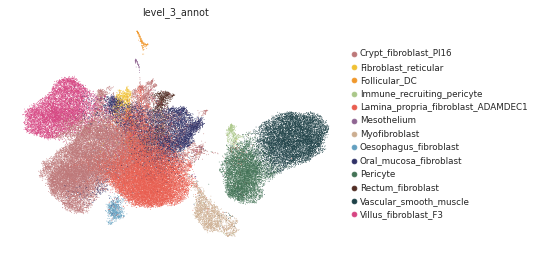

In [33]:
#plot UMAP and save figure - Figure 2c
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(fibro,color='level_3_annot',palette={
    
  'Crypt_fibroblast_PI16': '#bd7879',
     'Fibroblast_reticular': '#f0c134',

  
    'Follicular_DC': '#f0982c',
     'Immune_recruiting_pericyte': '#AAC789',
    'Lamina_propria_fibroblast_ADAMDEC1': '#e95e50',
     'Mesothelium': '#8F6592',
    'Myofibroblast': '#CCAE91',
    'Oesophagus_fibroblast': '#63A0C0',
  'Oral_mucosa_fibroblast': '#303267',
  
  'Pericyte': '#437356',
    
 
    
      'Rectum_fibroblast': '#522e25',
    'Vascular_smooth_muscle': '#1E4147',
      'Villus_fibroblast_F3': '#d64582',
     
},size=2.5,save='fibropooled_level3annot.pdf')

In [34]:
fibro.obs['disease'].cat.reorder_categories(['control',

 'crohns_disease',
 'ulcerative_colitis',
 'pediatric_IBD',                               
  'neighbouring_inflammed',
   'neighbouring_polyps',
'cancer_colorectal',
 'cancer_gastric',
'neighbouring_cancer'
   ], inplace=True)


<ipython-input-34-9791a11801da>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  fibro.obs['disease'].cat.reorder_categories(['control',


/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


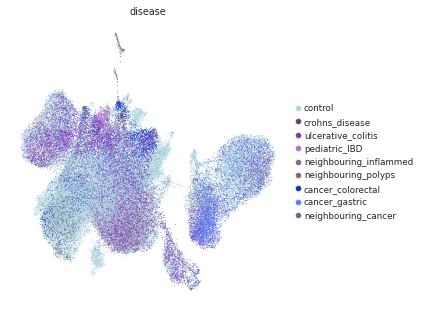

In [35]:
#plot UMAP and save figure - Extended data 4b
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(fibro,color='disease',palette = {'control': '#ADD3DD',
  'inutero': '#ffb7b7',
  'cancer_gastric': '#577eff',
  'crohns_disease': '#693C78',
  'pediatric_IBD': '#B670CD',
  'ulcerative_colitis': '#8934B1',
  'cancer_colorectal': '#1131bf',
  'preterm': '#f48154',
  'celiac_active': '#38B257',
  'celiac_treated': '#b8ed9d',
    'neighbouring_cancer': '#636c8a',
  'neighbouring_polyps': '#8a6375',
  'neighbouring_inflammed': '#82638a' 
                                           },size=2.5,save='fibropooled_disease.pdf')

In [36]:
list(fibro.obs['organ_unified'].unique())

['gingival mucosa',
 'stomach',
 'ileum',
 'salivary gland',
 'caecum',
 'ascending colon',
 'transverse colon',
 'descending colon',
 'sigmoid colon',
 'rectum',
 'appendix',
 'duodenum',
 'jejunum',
 'MLN',
 'oesophagus',
 'small intestine',
 'colon',
 'periodontium',
 'buccal mucosa']

In [37]:
fibro.obs['organ_groups'].cat.reorder_categories(['Oral_mucosa','Salivary_gland','Oesophagus',
                                                  'Stomach','Small_intestine','Large_intestine'], inplace=True)


<ipython-input-37-3d522522da9e>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  fibro.obs['organ_groups'].cat.reorder_categories(['Oral_mucosa','Salivary_gland','Oesophagus',


/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:378: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


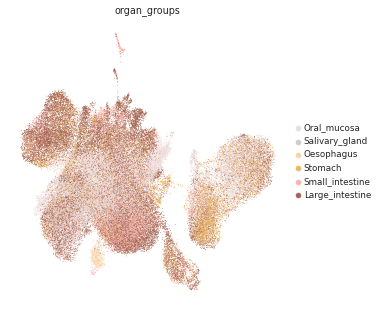

In [38]:
#plot UMAP and save figure - Extended data 4c
plt.rcParams['figure.figsize'] = [5,5]
sc.pl.umap(fibro,color='organ_groups',palette={'Oral_mucosa': '#eedbdb',
  'Salivary_gland': '#cecbcb',
  'Oesophagus': '#f9d4a7',
                                                   'Stomach': '#edb75f',
  'Small_intestine': '#feb2a8',
  'Large_intestine': '#a36352'}
,size=2.5,save='fibropooled_organ_groups.pdf')


In [39]:
fibro.X.max()

3704.0

In [40]:
sc.pp.normalize_per_cell(fibro, counts_per_cell_after=1e4)
sc.pp.log1p(fibro)

/home/jovyan/my-conda-envs/standard_plotting/lib/python3.8/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


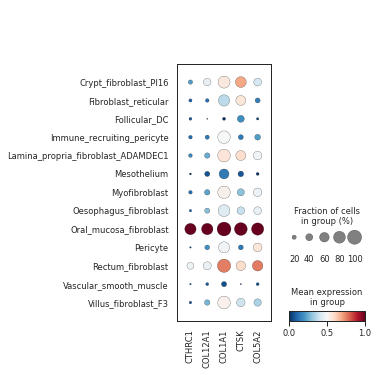

In [41]:
#plot markers and save figure - Figure 2c
sc.pl.dotplot(fibro,var_names=['CTHRC1','COL12A1','COL1A1','CTSK','COL5A2'],groupby='level_3_annot',color_map='RdBu_r', standard_scale='var',save='mes_oral_mucosa_fibro_markers.pdf')

In [42]:
fibro.obs.disease.value_counts()

control                   49902
neighbouring_cancer        7234
ulcerative_colitis         5454
cancer_gastric             4410
cancer_colorectal          3660
pediatric_IBD              3453
neighbouring_polyps        1274
crohns_disease             1163
neighbouring_inflammed      500
Name: disease, dtype: int64

In [43]:
oral = fibro[fibro.obs.level_3_annot.isin(['Oral_mucosa_fibroblast'])].copy()

In [44]:
oral.obs.disease.value_counts()

control                   4146
cancer_colorectal          866
ulcerative_colitis         673
pediatric_IBD              377
cancer_gastric             305
neighbouring_cancer        200
crohns_disease             182
neighbouring_polyps         25
neighbouring_inflammed       7
Name: disease, dtype: int64

In [45]:
list(oral.obs.disease.unique())

['control',
 'neighbouring_cancer',
 'neighbouring_polyps',
 'neighbouring_inflammed',
 'pediatric_IBD',
 'cancer_colorectal',
 'ulcerative_colitis',
 'crohns_disease',
 'cancer_gastric']

In [46]:
oral.obs['disease_simple'] = (
    oral.obs["disease"]
    .map(lambda x: {
        'control':'control',
 'neighbouring_cancer':'neighbouring',
 'neighbouring_polyps':'neighbouring',
 'neighbouring_inflammed':'neighbouring',
 'pediatric_IBD':'disease',
 'cancer_colorectal':'disease',
 'ulcerative_colitis':'disease',
 'crohns_disease':'disease',
 'cancer_gastric':'disease'
        
         }.get(x, x))
    .astype("category")
)

In [47]:
oral.obs['disease_simple2'] = (
    oral.obs["disease_simple"]
    .map(lambda x: {
        'neighbouring':'control',
        
         }.get(x, x))
    .astype("category")
)

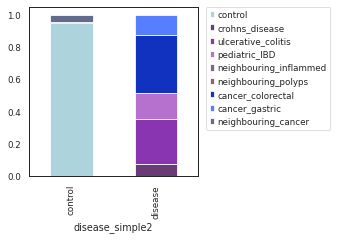

In [48]:
#plot disease distribution and save figure - Figure 2d
plt.rcParams['figure.figsize'] = [3,3]
tmp = pd.crosstab(oral.obs['disease_simple2'], oral.obs['disease'],normalize='index')
tmp.plot.bar(stacked=True, color = [#'control': 
                                    '#ADD3DD',
 #'crohns_disease': 
    '#693C78',
    #'ulcerative_colitis': 
    '#8934B1',
     #'pediatric_IBD': 
    '#B670CD',
    #'neighbouring_inflammed': 
    '#82638a' ,
    #'neighbouring_polyps': 
    '#8a6375',
    #'cancer_colorectal': 
    '#1131bf',
    #'cancer_gastric': 
    '#577eff',
    #'neighbouring_cancer': 
    '#636c8a',
  
  ]).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_oralmucosa_stackedbar_control_disease_simplevsdisease.pdf')

In [49]:
list(oral.obs.organ_unified.unique())

['gingival mucosa',
 'stomach',
 'salivary gland',
 'caecum',
 'ileum',
 'ascending colon',
 'transverse colon',
 'sigmoid colon',
 'rectum',
 'duodenum',
 'jejunum',
 'descending colon',
 'oesophagus',
 'colon',
 'periodontium',
 'buccal mucosa']

In [50]:
oral.obs['organ_unified_simple'] = (
    oral.obs["organ_unified"]
    .map(lambda x: {
         'duodenum':'small_intestine',
     'jejunum':'small_intestine',
    'ileum':'small_intestine',
    'caecum':'large_intestine',
 'ascending colon':'large_intestine',
 'transverse colon':'large_intestine',
     'descending colon':'large_intestine',
 'sigmoid colon':'large_intestine',
 'rectum':'large_intestine',
'colon':'large_intestine', 
        
         }.get(x, x))
    .astype("category")
)

In [51]:
oral.obs['organ_unified_simple'].cat.reorder_categories([
 'periodontium',
    'gingival mucosa',
 'buccal mucosa',
     'salivary gland',
     'oesophagus',
    'stomach',
     'small_intestine',
'large_intestine'], inplace=True)

<ipython-input-51-50479ca56f5a>:1: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  oral.obs['organ_unified_simple'].cat.reorder_categories([


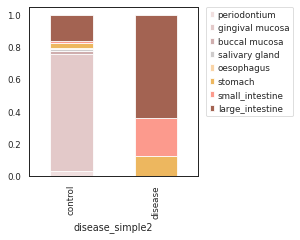

In [52]:
#plot disease distribution and save figure - Figure 2d
plt.rcParams['figure.figsize'] = [3,3]
tmp = pd.crosstab(oral.obs['disease_simple2'], oral.obs['organ_unified_simple'],normalize='index')
tmp.plot.bar(stacked=True, color = [#'periodontium': 
                                    '#f0dfdf',
  #'gingival mucosa': 
                                    '#e3c9c9',
  #'buccal mucosa': 
                                    '#cfaeae',
  #'salivary gland': 
                                    '#cecbcb',
  #'oesophagus': 
                                    '#f9d4a7',
  #'stomach': 
                                    '#edb75f',
  
  #'small_intestine': 
                                    '#fc9a8d',
  
  #'large_intestine': 
                                    '#a36352',
  ]).legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_oralmucosa_stackedbar_control_organsvsdisease.pdf')

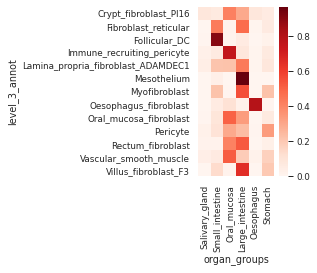

In [53]:
#save figure - Extended data 4d
conf_mat = sc.metrics.confusion_matrix('level_3_annot', "organ_groups",  fibro.obs, normalize=True)
plt.rcParams['figure.figsize'] = [1.7,3]
col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal
sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds')
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_FIBRO_confusion_all_organsvsannot.pdf')

In [54]:
control = fibro[fibro.obs.disease.isin(['control'])].copy()

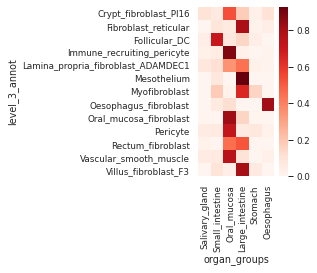

In [55]:
#save figure - Extended data 4d
conf_mat = sc.metrics.confusion_matrix('level_3_annot', "organ_groups",  control.obs, normalize=True)
plt.rcParams['figure.figsize'] = [1.7,3]
col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal
sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds')
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_FIBRO_confusion_controlonly_organsvsannot.pdf')

In [56]:
disease = fibro[~fibro.obs.disease.isin(['control'])].copy()

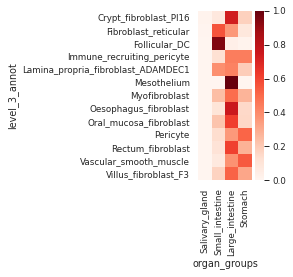

In [57]:
conf_mat = sc.metrics.confusion_matrix('level_3_annot', "organ_groups",  disease.obs, normalize=True)
plt.rcParams['figure.figsize'] = [1.2,3]
col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal
sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds')
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_FIBRO_confusion_diseaseonly_organsvsannot.pdf')

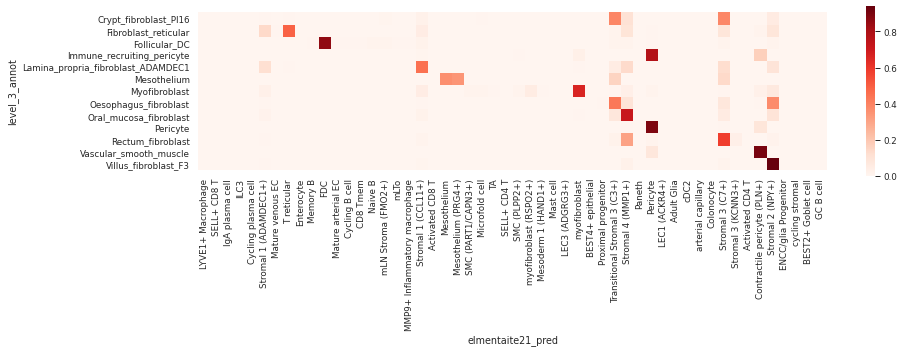

In [58]:
#save figure - Extended data 4f
conf_mat = sc.metrics.confusion_matrix('level_3_annot', "elmentaite21_pred",  fibro.obs, normalize=True)
plt.rcParams['figure.figsize'] = [14,3]
col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal
sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds',square = True)
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_FIBRO_confusion_elmentaitepredsvsannot.pdf')

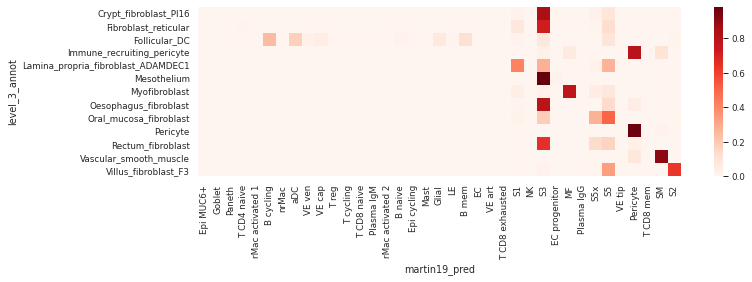

In [59]:
#save figure - Extended data 4f
conf_mat = sc.metrics.confusion_matrix('level_3_annot', "martin19_pred",  fibro.obs, normalize=True)
plt.rcParams['figure.figsize'] = [12,3]
col_order = conf_mat.idxmax(0).sort_values().index
conf_mat = conf_mat[col_order] ## Sort to have some sort of diagonal
sns.heatmap(conf_mat, xticklabels=True, yticklabels=True, cmap='Reds',square = True)
plt.savefig('/home/jovyan/ao15/Megagut/Annotations_v3/disease_analysis/figures/pooled_healthy_disease_FIBRO_confusion_martinpredvsannot.pdf')